In [3]:
from PIL import Image
from PIL.ExifTags import TAGS

import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#TODO: turn into function that renames all images in all folders/subfolders with "{date}_{time}_{type}" or some other scheme to extract date/time info from already-sorted images.

def getFileInfo(parent):

    for root, dirs, files in os.walk(parent):

        for name in files:


            filePath = os.path.join(root, name)
            print(filePath)

            image = cv2.imread(filePath)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()

            image_data = Image.open(filePath)
            exifdata = image_data.getexif()
            print(exifdata.get(306))

In [6]:
subpath = r"E:\Big Datasets\HLH (2022 - 2024)"

In [7]:
total = sum(len(files) for subdir, dirs, files in os.walk(subpath))
print(f"Size of directory: {total}")

def addSitetoFileName(subpath):

    for subdir, dirs, files in os.walk(subpath):

        for file in files:

            filepath = os.path.join(subdir, file)

            dirname = os.path.dirname(filepath)

            basename = os.path.basename(dirname)

            basename = basename.replace('-',' ')
            basename = basename.replace('_', ' ')
            
            sitename = (basename.split())[0]

            print(filepath)
            os.rename(filepath, os.path.join(dirname, (sitename + "_" + file)))

Size of directory: 32833


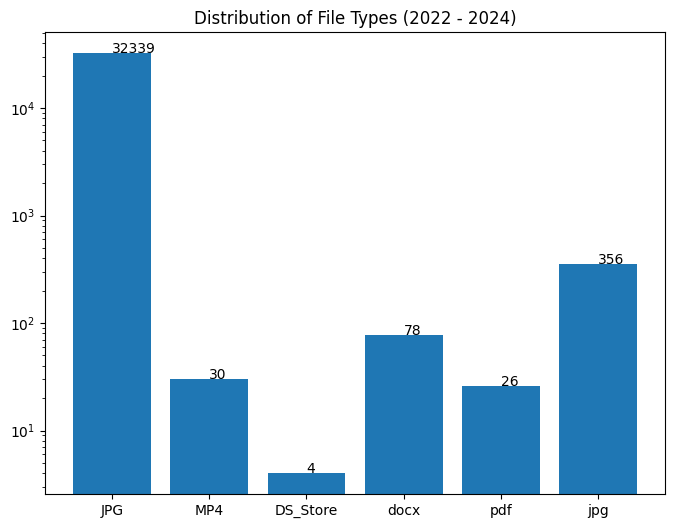

In [8]:
#def countFileTypes(subpath):

file_types = {}

for subdir, dirs, files in os.walk(subpath):

    for file in files:

        extension = file[file.rfind('.') + 1:]

        if (file_types.__contains__(extension)):

            file_types[extension] += 1

        else:

            file_types[extension] = 1

        #if (extension == "DS_Store"):

        #    print(os.path.join(subdir, file))
        


plt.figure(figsize = (8, 6))
plt.bar(x = list(file_types.keys()), height = list(file_types.values()))
plt.yscale('log')

values_list = list(file_types.values())

for i in range(len(file_types)):

    plt.text(i, values_list[i], values_list[i])

plt.title("Distribution of File Types (2022 - 2024)")
plt.show()


In [12]:
sorted_parent = r"E:\Big Datasets\HLH (2022 - 2024)\Sorted"

In [13]:
#values as of 7/16/2025
values = [8, 1, 1, 1, 2, 13, 57, 42, 85, 7, 30, 11]

IndexError: list index out of range

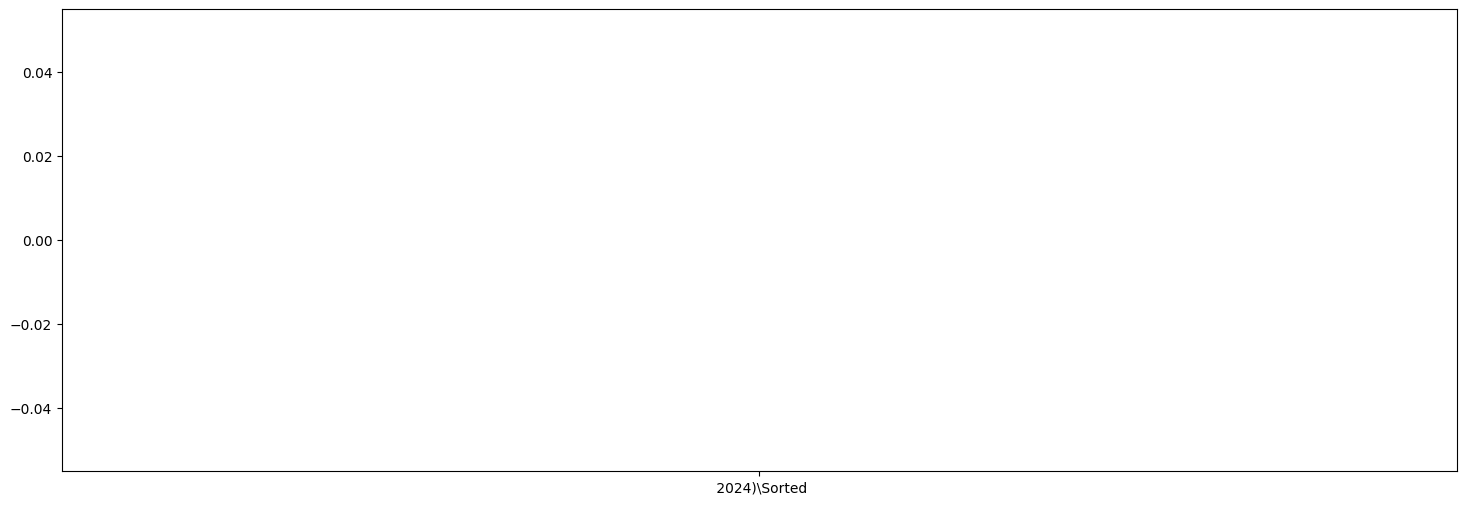

In [14]:
labels = []
values = []

for root, dirs, files in os.walk(sorted_parent):

    labels.append(root)
    values.append(len(files))


for i, x in enumerate(labels):

    labels[i] = labels[i][27:]


#labels.remove('')
values.remove(values[0])

plt.figure(figsize=(18, 6))
plt.bar(labels, values, width = 0.8)

for i in range(len(labels)):

    plt.text(i, values[i], values[i])
    
plt.title("Counts of Respective Animal Labels")